In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [317]:
dt_eda = pd.read_csv('output_eda_elite_3.csv', index_col=0)
dt_opt = pd.read_csv('output_optimizers_2.csv', index_col=0)

In [318]:
dt_eda_gb_mean = dt_eda.groupby(['p']).mean()[['best_cost', 'time']]
dt_eda_gb_std = dt_eda.groupby(['p']).std()[['best_cost', 'time']]

dt_opt_gb_mean = dt_opt.groupby(['opt', 'p']).mean()[['best_cost', 'time']]
dt_opt_gb_std = dt_opt.groupby(['opt', 'p']).std()[['best_cost', 'time']]

ADAM no ha sido analizado porque el tiempo crece de manera abusiva

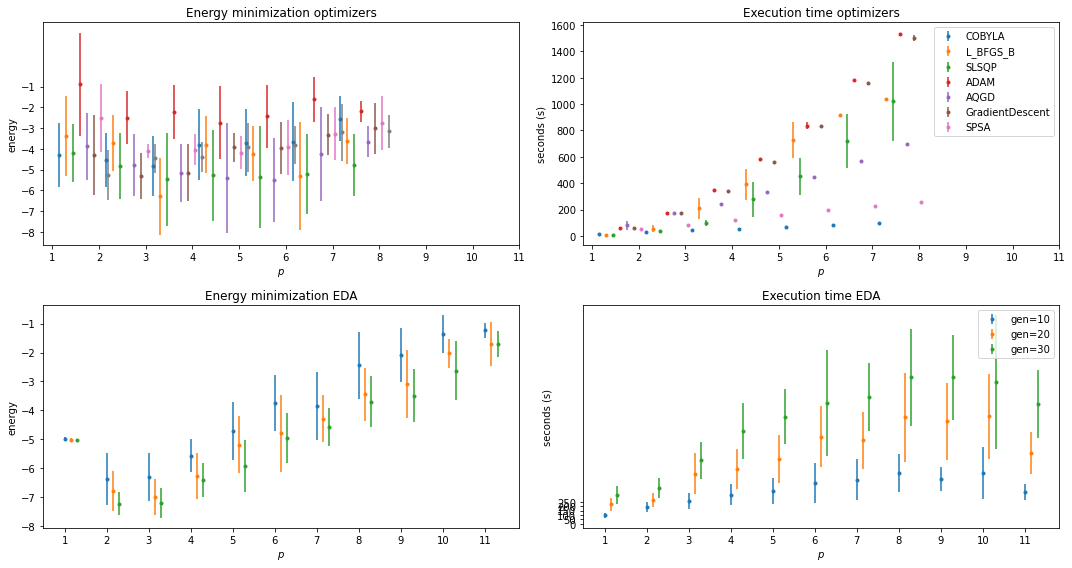

In [319]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Energy minimization optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['best_cost'].values, yerr=dt_eda_gb_std['best_cost'].values, fmt='.', label='EDA')
aux = 0.15
for opt in dt_opt['opt'].unique():
# for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
    dt_aux_mean = dt_opt_gb_mean.loc[opt]
    dt_aux_std = dt_opt_gb_std.loc[opt]
    plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.15
    
plt.xlabel('$p$')
plt.yticks(np.arange(-8, 0, 1))
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(222)
plt.title('Execution time optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['time'].values, yerr=dt_eda_gb_std['time'].values, fmt='.', label='EDA')
aux = 0.15
for opt in dt_opt['opt'].unique():
    if opt != 'CG':
# for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
        dt_aux_mean = dt_opt_gb_mean.loc[opt]
        dt_aux_std = dt_opt_gb_std.loc[opt]
        plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
        aux = aux + 0.15

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))

plt.subplot(223)
plt.title('Energy minimization EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['best_cost'].values, yerr=gb_std['best_cost'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.yticks(np.arange(-8, 0, 1))
plt.xlabel('$p$')
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(224)
plt.title('Execution time EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['time'].values, yerr=gb_std['time'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.legend()
plt.yticks(range(0, 260, 50))
plt.xlabel('$p$')
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))

plt.tight_layout()

plt.show()

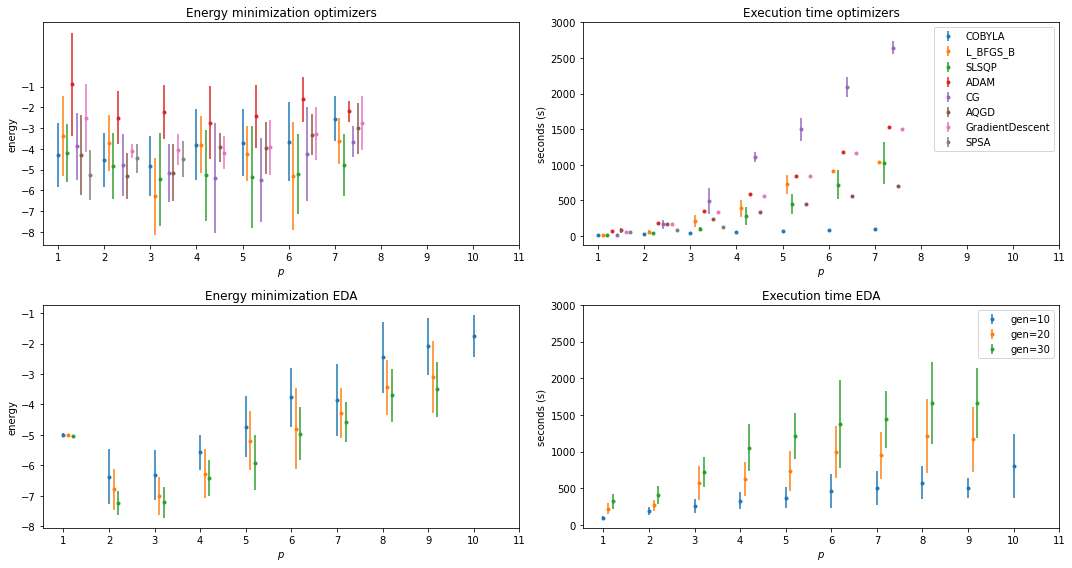

In [29]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Energy minimization optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['best_cost'].values, yerr=dt_eda_gb_std['best_cost'].values, fmt='.', label='EDA')
aux = 0
for opt in dt_opt['opt'].unique():
# for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
    dt_aux_mean = dt_opt_gb_mean.loc[opt]
    dt_aux_std = dt_opt_gb_std.loc[opt]
    plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.10
    
plt.xlabel('$p$')
plt.yticks(np.arange(-8, 0, 1))
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(222)
plt.title('Execution time optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['time'].values, yerr=dt_eda_gb_std['time'].values, fmt='.', label='EDA')
aux = 0
for opt in dt_opt['opt'].unique():
#     if opt != 'CG':
# for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP', 'AQGD']:
        dt_aux_mean = dt_opt_gb_mean.loc[opt]
        dt_aux_std = dt_opt_gb_std.loc[opt]
        plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
        aux = aux + 0.10

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))
plt.yticks(range(0, 3100, 500))

plt.subplot(223)
plt.title('Energy minimization EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['best_cost'].values, yerr=gb_std['best_cost'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.10
    
plt.yticks(np.arange(-8, 0, 1))
plt.xlabel('$p$')
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(224)
plt.title('Execution time EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['time'].values, yerr=gb_std['time'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.10
    
plt.legend()
# plt.yticks(range(0, 1500, 200))
plt.xlabel('$p$')
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))
plt.yticks(range(0, 3100, 500))

plt.tight_layout()
plt.savefig('eda_vs_optimizers.pdf')
plt.show()

## 10 size max_cut

In [2]:
dt_eda = pd.read_csv('output_eda_elite_3_opt.csv', index_col=0)
dt_opt = pd.read_csv('output_optimizers_2.csv', index_col=0)

In [3]:
dt_eda_gb_mean = dt_eda.groupby(['p']).mean()[['best_cost', 'time']]
dt_eda_gb_std = dt_eda.groupby(['p']).std()[['best_cost', 'time']]

dt_opt_gb_mean = dt_opt.groupby(['opt', 'p']).mean()[['best_cost', 'time']].reset_index()
dt_opt_gb_std = dt_opt.groupby(['opt', 'p']).std()[['best_cost', 'time']].reset_index()

In [4]:
for size in [10, 20, 30]:
    dt_aux_mean = dt_eda.groupby(['size_gen', 'p']).mean().loc[size].reset_index()[['p', 'best_cost', 'time']]
    dt_aux_mean['opt'] = 'eda_' + str(size)
    dt_opt_gb_mean = dt_opt_gb_mean.append(dt_aux_mean[dt_opt_gb_mean.columns])
    
    dt_aux_std = dt_eda.groupby(['size_gen', 'p']).std().loc[size].reset_index()[['p', 'best_cost', 'time']]
    dt_aux_std['opt'] = 'eda_' + str(size)
    dt_opt_gb_std = dt_opt_gb_std.append(dt_aux_std[dt_opt_gb_std.columns])

([<matplotlib.axis.XTick at 0x20127c11130>,
 [Text(10, 0, '1'),
  Text(20, 0, '2'),
  Text(30, 0, '3'),
  Text(40, 0, '4'),
  Text(50, 0, '5'),
  Text(60, 0, '6'),
  Text(70, 0, '7'),
  Text(80, 0, '8'),
  Text(90, 0, '9'),
  Text(100, 0, '10'),
  Text(110, 0, '11')])

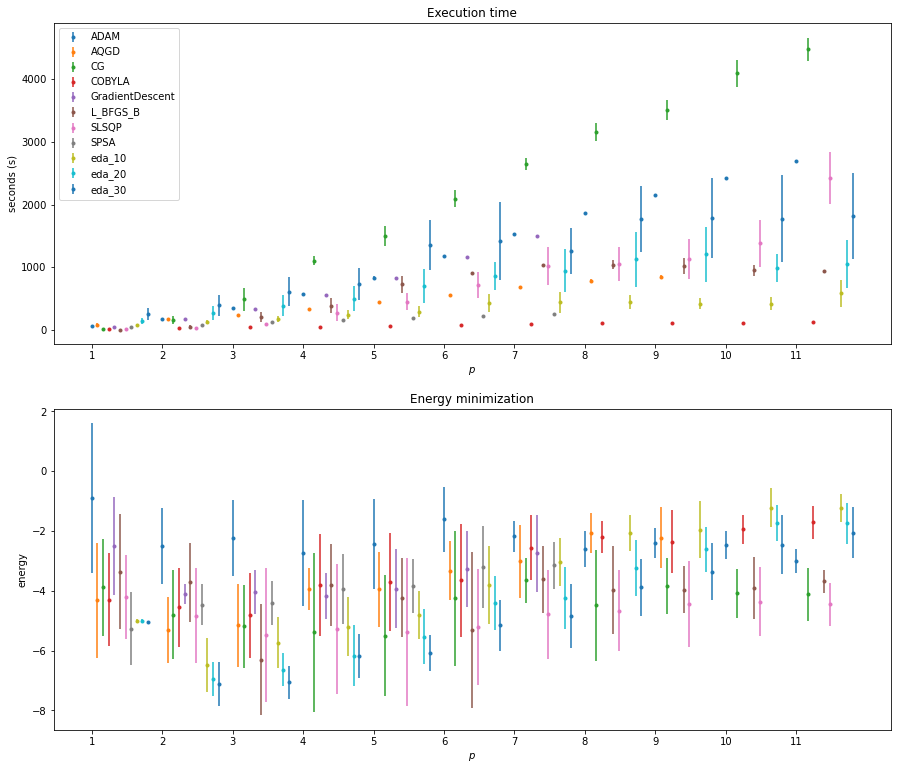

In [5]:
plt.figure(figsize=(15,13))

plt.subplot(211)
size_ps = len(dt_aux_mean['p'].unique())
plt.title('Execution time')
aux = 0
for opt in dt_opt_gb_mean['opt'].unique():
    dt_aux_mean = dt_opt_gb_mean[dt_opt_gb_mean['opt'] == opt]
    dt_aux_std = dt_opt_gb_std[dt_opt_gb_std['opt'] == opt]
    plt.errorbar([i*10 + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
    aux = aux + 0.8

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks([i*10 for i in range(1, 12)], range(1, 12))

plt.subplot(212)
size_ps = len(dt_aux_mean['p'].unique())
plt.title('Energy minimization')
aux = 0
for opt in dt_opt_gb_mean['opt'].unique():
    dt_aux_mean = dt_opt_gb_mean[dt_opt_gb_mean['opt'] == opt]
    dt_aux_std = dt_opt_gb_std[dt_opt_gb_std['opt'] == opt]
    plt.errorbar([i*10 + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.8

plt.xlabel('$p$')
# plt.legend()
plt.ylabel('energy')
plt.xticks([i*10 for i in range(1, 12)], range(1, 12))
# plt.savefig('comparison_opt.pdf')

## 10 size max_cut VQE

([<matplotlib.axis.XTick at 0x20127da3370>,
 [Text(10, 0, '1'),
  Text(20, 0, '2'),
  Text(30, 0, '3'),
  Text(40, 0, '4'),
  Text(50, 0, '5'),
  Text(60, 0, '6')])

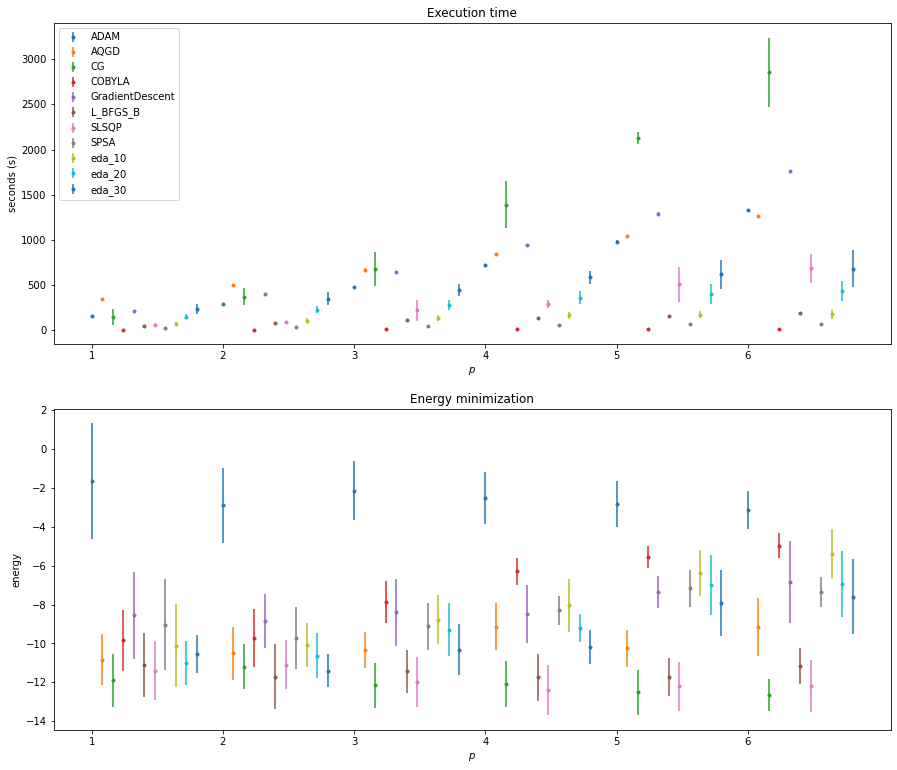

In [6]:
dt_eda = pd.read_csv('output_eda_elite_3_opt_vqe.csv', index_col=0)
dt_opt = pd.read_csv('output_optimizers_10_vqe.csv', index_col=0)

dt_eda_gb_mean = dt_eda.groupby(['p']).mean()[['best_cost', 'time']]
dt_eda_gb_std = dt_eda.groupby(['p']).std()[['best_cost', 'time']]

dt_opt_gb_mean = dt_opt.groupby(['opt', 'p']).mean()[['best_cost', 'time']].reset_index()
dt_opt_gb_std = dt_opt.groupby(['opt', 'p']).std()[['best_cost', 'time']].reset_index()

for size in [10, 20, 30]:
    dt_aux_mean = dt_eda.groupby(['size_gen', 'p']).mean().loc[size].reset_index()[['p', 'best_cost', 'time']]
    dt_aux_mean['opt'] = 'eda_' + str(size)
    dt_opt_gb_mean = dt_opt_gb_mean.append(dt_aux_mean[dt_opt_gb_mean.columns])
    
    dt_aux_std = dt_eda.groupby(['size_gen', 'p']).std().loc[size].reset_index()[['p', 'best_cost', 'time']]
    dt_aux_std['opt'] = 'eda_' + str(size)
    dt_opt_gb_std = dt_opt_gb_std.append(dt_aux_std[dt_opt_gb_std.columns])
    
plt.figure(figsize=(15,13))

plt.subplot(211)
size_ps = len(dt_aux_mean['p'].unique())
plt.title('Execution time')
aux = 0
for opt in dt_opt_gb_mean['opt'].unique():
    dt_aux_mean = dt_opt_gb_mean[dt_opt_gb_mean['opt'] == opt]
    dt_aux_std = dt_opt_gb_std[dt_opt_gb_std['opt'] == opt]
    plt.errorbar([i*10 + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
    aux = aux + 0.8

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks([i*10 for i in range(1, 7)], range(1, 7))

plt.subplot(212)
size_ps = len(dt_aux_mean['p'].unique())
plt.title('Energy minimization')
aux = 0
for opt in dt_opt_gb_mean['opt'].unique():
    dt_aux_mean = dt_opt_gb_mean[dt_opt_gb_mean['opt'] == opt]
    dt_aux_std = dt_opt_gb_std[dt_opt_gb_std['opt'] == opt]
    plt.errorbar([i*10 + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.8

plt.xlabel('$p$')
# plt.legend()
plt.ylabel('energy')
plt.xticks([i*10 for i in range(1, 7)], range(1, 7))
# plt.savefig('comparison_opt_VQE.pdf')

## 12 size

([<matplotlib.axis.XTick at 0x20127edd4c0>,
 [Text(10, 0, '1'),
  Text(20, 0, '2'),
  Text(30, 0, '3'),
  Text(40, 0, '4'),
  Text(50, 0, '5'),
  Text(60, 0, '6'),
  Text(70, 0, '7'),
  Text(80, 0, '8'),
  Text(90, 0, '9'),
  Text(100, 0, '10'),
  Text(110, 0, '11')])

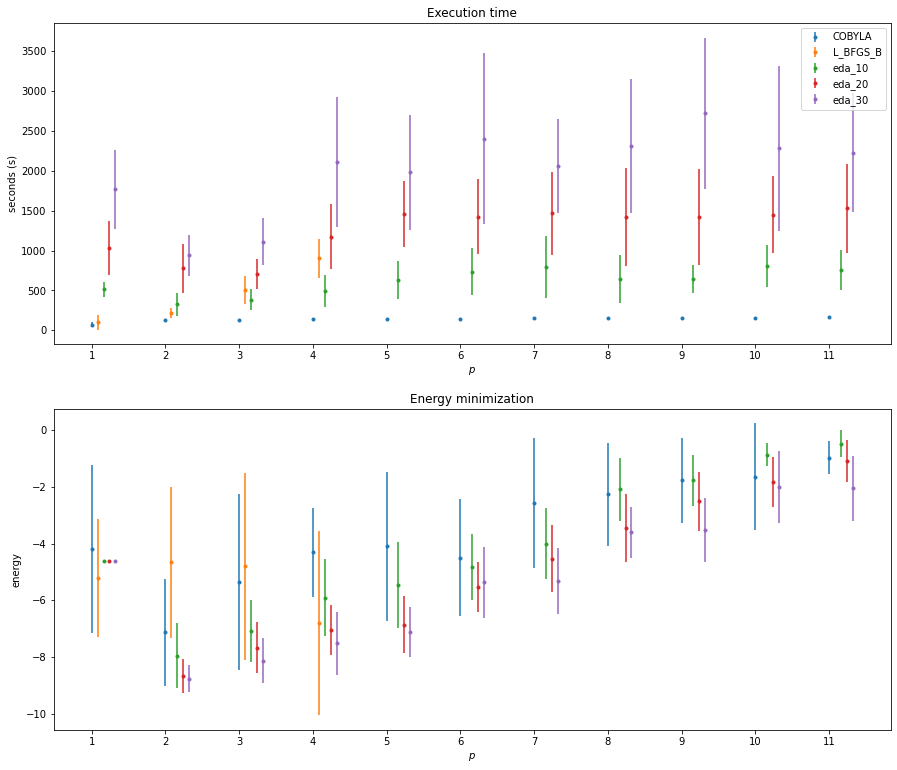

In [7]:
dt_eda = pd.read_csv('output_eda_12.csv', index_col=0)
dt_opt = pd.read_csv('output_optimizers_12.csv', index_col=0)

dt_eda_gb_mean = dt_eda.groupby(['p']).mean()[['best_cost', 'time']]
dt_eda_gb_std = dt_eda.groupby(['p']).std()[['best_cost', 'time']]

dt_opt_gb_mean = dt_opt.groupby(['opt', 'p']).mean()[['best_cost', 'time']].reset_index()
dt_opt_gb_std = dt_opt.groupby(['opt', 'p']).std()[['best_cost', 'time']].reset_index()

for size in [10, 20, 30]:
    dt_aux_mean = dt_eda.groupby(['size_gen', 'p']).mean().loc[size].reset_index()[['p', 'best_cost', 'time']]
    dt_aux_mean['opt'] = 'eda_' + str(size)
    dt_opt_gb_mean = dt_opt_gb_mean.append(dt_aux_mean[dt_opt_gb_mean.columns])
    
    dt_aux_std = dt_eda.groupby(['size_gen', 'p']).std().loc[size].reset_index()[['p', 'best_cost', 'time']]
    dt_aux_std['opt'] = 'eda_' + str(size)
    dt_opt_gb_std = dt_opt_gb_std.append(dt_aux_std[dt_opt_gb_std.columns])
    
plt.figure(figsize=(15,13))

plt.subplot(211)
size_ps = len(dt_aux_mean['p'].unique())
plt.title('Execution time')
aux = 0
for opt in dt_opt_gb_mean['opt'].unique():
    dt_aux_mean = dt_opt_gb_mean[dt_opt_gb_mean['opt'] == opt]
    dt_aux_std = dt_opt_gb_std[dt_opt_gb_std['opt'] == opt]
    plt.errorbar([i*10 + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
    aux = aux + 0.8

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks([i*10 for i in range(1, 12)], range(1, 12))

plt.subplot(212)
size_ps = len(dt_aux_mean['p'].unique())
plt.title('Energy minimization')
aux = 0
for opt in dt_opt_gb_mean['opt'].unique():
    dt_aux_mean = dt_opt_gb_mean[dt_opt_gb_mean['opt'] == opt]
    dt_aux_std = dt_opt_gb_std[dt_opt_gb_std['opt'] == opt]
    plt.errorbar([i*10 + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.8

plt.xlabel('$p$')
# plt.legend()
plt.ylabel('energy')
plt.xticks([i*10 for i in range(1, 12)], range(1, 12))
# plt.savefig('comparison_opt_12.pdf')

## Noise comparison

In [13]:
vqe_dep = pd.read_csv('output_eda_elite_3_opt_vqe_dep.csv', index_col=0)
pd.set_option('display.max_rows', vqe_dep.shape[0]+1)
vqe_dep.groupby(['p', 'size_gen', 'gamma']).mean()

it  best_cost        time
p size_gen gamma                             
1 10       0.00001   7 -10.226259  136.687500
           0.00010   7 -10.652062  100.069792
           0.00100   7 -10.124397   97.702083
           0.01000   7 -10.087577   96.590625
           0.10000   7 -10.719960  100.540625
  20       0.00001   7 -11.028034  142.519792
           0.00010   7 -10.726658  181.663542
           0.00100   7 -11.318995  175.679167
           0.01000   7 -10.925643  186.914583
           0.10000   7 -10.489079  173.662500
  30       0.00001   7 -11.165880  297.208333
           0.00010   7 -11.254768  282.934375
           0.00100   7 -10.755504  311.036458
           0.01000   7 -11.059365  297.683333
           0.10000   7 -11.409749  306.413542
2 10       0.00001   7 -10.698746  131.409375
           0.00010   7  -9.149569  116.517708
           0.00100   7 -10.110036  119.356250
           0.01000   7 -10.009933  127.843750
           0.10000   7 -10.086694  115.102083
  20       0.00001   7 -10.819020  238.582292
           0.00010   7 -10.656436  243.872917
           0.00100   7 -10.693912  243.093750
           0.01000   7 -10.931670  266.014583
           0.10000   7 -11.281716  246.766667
  30       0.00001   7 -11.101939  357.614583
           0.00010   7 -11.263204  407.209375
           0.00100   7 -11.209235  387.290625
           0.01000   7 -11.576493  342.705208
           0.10000   7 -11.070410  375.155208
3 10       0.00001   7  -8.190267  136.250000
           0.00010   7  -8.961811  155.108333
           0.00100   7  -9.156466  138.811458
           0.01000   7  -8.297472  139.013542
           0.10000   7  -8.839160  149.747917
  20       0.00001   7  -9.945110  300.472917
           0.00010   7  -9.802862  311.278125
           0.00100   7  -9.925194  302.455208
           0.01000   7  -9.980667  315.535417
           0.10000   7  -9.363004  280.615625
  30       0.00001   7 -10.810005  458.055208
           0.00010   7 -10.031061  438.818750
           0.00100   7 -10.022512  470.353125
           0.01000   7 -10.027715  485.657292
           0.10000   7 -10.232753  464.396875
4 10       0.00001   7  -8.140870  156.126042
           0.00010   7  -7.626323  157.748958
           0.00100   7  -8.198599  175.552083
           0.01000   7  -8.186052  177.830208
           0.10000   7  -7.451070  161.892708
  20       0.00001   7  -9.338683  362.561458
           0.00010   7  -9.446587  396.111458
           0.00100   7  -8.905991  347.515625
           0.01000   7  -9.427212  337.511458
           0.10000   7  -8.978044  367.897917
  30       0.00001   7  -9.187736  549.690625
           0.00010   7  -9.514153  539.085417
           0.00100   7  -9.562992  552.527083
           0.01000   7  -8.508456  519.431250
           0.10000   7  -9.522767  561.945833
5 10       0.00001   7  -5.932823  150.467708
           0.00010   7  -6.429053  188.362500
           0.00100   7  -5.684062  157.142708
           0.01000   7  -5.952952  163.239583
           0.10000   7  -6.064358  169.841667
  20       0.00001   7  -7.420328  385.655208
           0.00010   7  -7.359330  384.844792
           0.00100   7  -7.794196  426.313542
           0.01000   7  -7.208104  356.659375
           0.10000   7  -6.952799  354.454167
  30       0.00001   7  -8.088971  640.075000
           0.00010   7  -8.166518  601.276042
           0.00100   7  -8.698022  664.691667
           0.01000   7  -7.559839  524.551042
           0.10000   7  -8.331024  629.539583
6 10       0.00001   7  -5.815867  183.736458
           0.00010   7  -5.523161  180.153125
           0.00100   7  -5.506616  175.621875
           0.01000   7  -5.348879  169.201042
           0.10000   7  -5.547828  171.676042
  20       0.00001   7  -6.384125  421.063542
           0.00010   7  -6.885715  444.366667
           0.00100   7  -6.419062  412.265625
           0.01000   7  -6.763669  408.281250
           0.10000   7  -6.824295  440.494792
  30       0.00001

In [80]:
vqe_amp = pd.read_csv('output_eda_elite_3_opt_vqe_amp.csv', index_col=0)
pd.set_option('display.max_rows', vqe_amp.shape[0]+1)
vqe_amp_gb = vqe_amp.groupby(['p', 'size_gen', 'gamma']).mean()

vqe_pha = pd.read_csv('output_eda_elite_3_opt_vqe_pha.csv', index_col=0)
pd.set_option('display.max_rows', vqe_pha.shape[0]+1)
vqe_pha_gb = vqe_pha.groupby(['p', 'size_gen', 'gamma']).mean()

In [81]:
dt_eda = pd.read_csv('output_eda_elite_3_opt_vqe.csv', index_col=0)

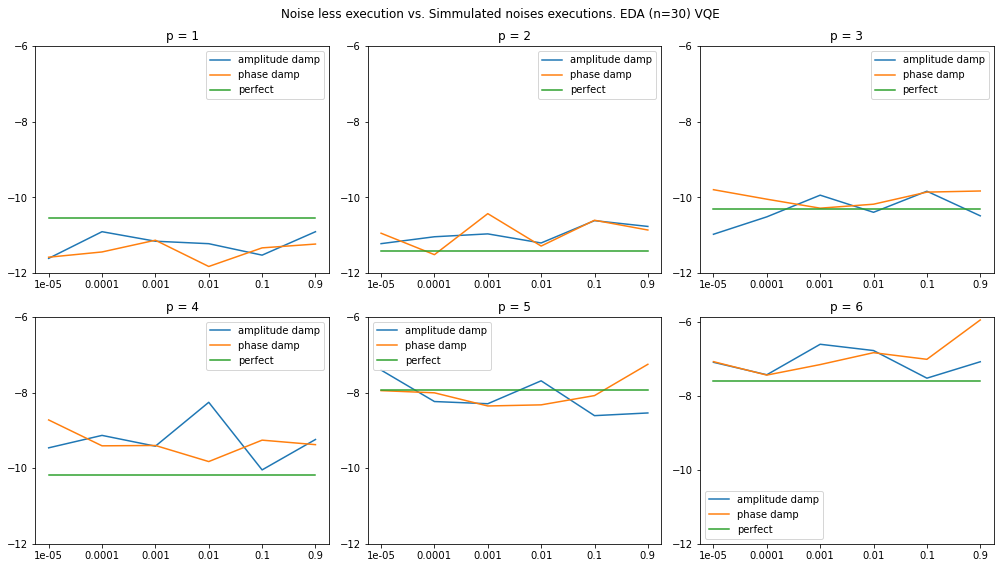

In [86]:
plt.figure(figsize=(14, 8))
size_gen=30
plt.suptitle('Noise less execution vs. Simmulated noises executions. EDA (n=' + str(size_gen) + ') VQE')

for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.title('p = ' + str(i))
    noises = range(-5, 1, 1)
    plt.plot(noises, pd.DataFrame(vqe_amp_gb.loc[i].loc[size_gen])['best_cost'], label='amplitude damp')
    plt.plot(noises, pd.DataFrame(vqe_pha_gb.loc[i].loc[size_gen])['best_cost'], label='phase damp')
    plt.plot(noises, 
             [dt_eda.groupby(['size_gen', 'p']).mean().loc[size_gen].loc[i]['best_cost']]*len(vqe_pha.gamma.unique()), 
             label='perfect')
    plt.xticks(noises, vqe_amp.gamma.unique())
    plt.yticks(range(-12, -5, 2))
    plt.legend()
    
plt.tight_layout()
plt.show()